<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/NLP/7_5_Affinity_Propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#7.5. Affinity Propagation

Affinity Propagation (AP) — это алгоритм кластеризации, который использует меру сходства между объектами для обнаружения кластеров. В отличие от традиционных алгоритмов, таких как k-средних, AP не требует заранее определять количество кластеров. Алгоритм разрабатывает кластерные центры (экземпляры, которые будут представлять кластеры) и использует их для создания окончательной кластеризации. Мы рассмотрим теоретическую основу AP, математические формулы, используемые в алгоритме, и пример применения в задачах обработки естественного языка (NLP).

#### 1. Теоретическая основа Affinity Propagation

AP работает путем обмена сообщениями между парами точек данных, используя два типа сообщений: сообщения ответственности и сообщения доступности. Эти сообщения представляют собой числовые величины, которые описывают, насколько подходящей является точка для того, чтобы быть кластерным центром для другой точки.

Пусть у нас имеется множество объектов $X = \{x_1, x_2, \ldots, x_N\}$, и мы хотим разбить их на кластеры, основываясь на матрице сходства $S$, где $S_{ij}$ представляет собой меру сходства между объектами $x_i$ и $x_j$.

##### 1.1. Матрица сходства

Матрица сходства $S$ является основной входной структурой для AP. $S_{ij}$ определяется как мера того, насколько хорошо объект $x_j$ может служить в качестве представителя объекта $x_i$. Чем больше $S_{ij}$, тем более вероятно, что $x_j$ будет выбран в качестве представителя $x_i$. Обычно, сходство можно задавать как отрицательное евклидово расстояние:
$$
S_{ij} = -\|x_i - x_j\|^2,
$$
где $\|x_i - x_j\|$ — евклидово расстояние между объектами $x_i$ и $x_j$. Для задач NLP часто используют косинусное сходство:
$$
S_{ij} = \frac{x_i \cdot x_j}{\|x_i\| \|x_j\|},
$$
где $x_i$ и $x_j$ — векторные представления текстов.

##### 1.2. Ответственность и доступность

Два ключевых компонента алгоритма — это сообщения, передаваемые между объектами:
- Ответственность $r(i, k)$ — указывает, насколько подходит объект $x_k$ для того, чтобы быть кластерным центром для объекта $x_i$.
- Доступность $a(i, k)$ — указывает, насколько подходящим является объект $x_i$ для того, чтобы объект $x_k$ служил его кластерным центром.

###### 1.2.1. Вычисление ответственности

Изначально ответственность $r(i, k)$ задается как:
$$
r(i, k) = S_{ik} - \max_{k' \neq k} \left( a(i, k') + S_{ik'} \right),
$$
где $a(i, k') + S_{ik'}$ представляет собой совместное влияние доступности и сходства между объектами $x_i$ и $x_{k'}$.

###### 1.2.2. Вычисление доступности

Доступность $a(i, k)$ вычисляется как:
$$
a(i, k) = \min \left( 0, r(k, k) + \sum_{i' \notin \{i, k\}} \max(0, r(i', k)) \right),
$$
где $r(k, k)$ — это собственная ответственность точки $x_k$, показывающая, насколько объект $x_k$ хочет быть своим собственным кластерным центром.

Для диагональных элементов $a(k, k)$ формула принимает вид:
$$
a(k, k) = \sum_{i' \neq k} \max(0, r(i', k)).
$$

#### 2. Алгоритм Affinity Propagation

Алгоритм выполняется итеративно до сходимости, чередуя обновления значений ответственности и доступности. Процесс выполняется следующим образом:

1. Инициализация: Все значения ответственности $r(i, k)$ и доступности $a(i, k)$ устанавливаются в ноль.
2. Итеративное обновление: Обновляются значения $r(i, k)$ и $a(i, k)$ согласно вышеуказанным формулам.
3. Сходность: Алгоритм прекращает выполнение, когда значения сообщений перестают существенно изменяться, или по истечении заданного количества итераций.
4. Определение кластерных центров: Для каждой точки определяется кластерный центр $k$, который максимизирует сумму $a(i, k) + r(i, k)$.

#### 3. Применение Affinity Propagation в NLP

В задачах NLP, Affinity Propagation может быть использован для кластеризации текстов, документов, предложений или слов. Рассмотрим несколько примеров использования.

##### 3.1. Кластеризация текстов

Пусть у нас есть набор текстовых документов, и мы хотим сгруппировать их по схожим темам. Основные шаги включают:

1. Представление текстов в виде векторов: Например, можно использовать модели TF-IDF, word2vec или BERT для преобразования каждого документа в вектор.
2. Вычисление матрицы сходства: Используем косинусное сходство между векторами, чтобы заполнить матрицу $S$.
3. Запуск Affinity Propagation: Выполняем алгоритм AP на матрице $S$, чтобы найти кластерные центры.
4. Интерпретация результатов: Каждая группа документов соответствует одному кластеру, а выбор кластерного центра может дать представление о центральной теме этой группы.

##### 3.2. Кластеризация предложений

Для задач, таких как извлечение обобщенных ответов на вопросы или резюмирование текста, можно использовать AP для кластеризации предложений внутри одного или нескольких документов.

1. Преобразование предложений в векторы: Применяем BERT или Sentence Transformers для преобразования каждого предложения в векторное представление.
2. Заполнение матрицы сходства: Используем косинусное сходство между векторными представлениями предложений.
3. Применение AP: Алгоритм помогает находить группы схожих предложений, что может использоваться для выбора наиболее репрезентативных предложений для итогового резюме.

#### 4. Математические аспекты и примеры

Рассмотрим пример вычисления сообщений для конкретного случая. Пусть у нас есть три объекта $x_1, x_2, x_3$ с матрицей сходства:
$$
S = \begin{bmatrix}
0 & -2 & -3 \\
-2 & 0 & -1 \\
-3 & -1 & 0 \\
\end{bmatrix}
$$
(значения на диагонали — это "преференции", показывающие, насколько вероятно, что каждый объект может быть своим собственным кластерным центром).

Инициализируем $r(i, k) = 0$ и $a(i, k) = 0$ для всех $i, k$.

1. Первая итерация: Вычисляем $r(i, k)$ и $a(i, k)$ для всех пар:
   - $r(1, 2) = S_{12} - \max(S_{13}) = -2 - (-3) = 1$
   - $a(1, 2) = \min(0, r(2, 2)) = 0$

2. Далее продолжаем аналогично.

#### 5. Сходимость и выбор гиперпараметров

Алгоритм требует выбора параметра демпфирования, который помогает стабилизировать обновление сообщений. Обычно этот параметр выбирается из диапазона $0.5 \leq \lambda < 1$.



Давайте рассмотрим два числовых примера, показывающих, как применять Affinity Propagation в задачах обработки естественного языка (NLP). Эти примеры будут включать пошаговое решение с вычислениями.

### Пример 1: Кластеризация документов

#### Задача

Допустим, у нас есть три текстовых документа, и мы хотим сгруппировать их на основе их содержания.

- Документ 1: "Кошки и собаки"
- Документ 2: "Собаки и мыши"
- Документ 3: "Кошки ловят мышей"

#### Шаг 1: Векторизация документов

Сначала преобразуем документы в векторы. Для простоты примем, что у нас уже есть векторы, полученные с помощью TF-IDF:

- $ x_1 = [1, 0.5, 0]$ (Документ 1)
- $ x_2 = [0, 1, 0.5]$ (Документ 2)
- $ x_3 = [1, 0, 0.5]$ (Документ 3)

#### Шаг 2: Вычисление матрицы сходства

Теперь вычислим матрицу сходства $ S$ с использованием косинусного сходства:

$$
S_{ij} = \frac{x_i \cdot x_j}{\|x_i\| \|x_j\|}.
$$

- Вычисление норм:
  $$
  \|x_1\| = \sqrt{1^2 + 0.5^2 + 0^2} = \sqrt{1.25} \approx 1.12,
  $$
  $$
  \|x_2\| = \sqrt{0^2 + 1^2 + 0.5^2} = \sqrt{1.25} \approx 1.12,
  $$
  $$
  \|x_3\| = \sqrt{1^2 + 0^2 + 0.5^2} = \sqrt{1.25} \approx 1.12.
  $$

- Вычисление сходства:
  $$
  S_{12} = \frac{x_1 \cdot x_2}{\|x_1\| \|x_2\|} = \frac{(1 \cdot 0 + 0.5 \cdot 1 + 0 \cdot 0.5)}{1.12 \cdot 1.12} = \frac{0.5}{1.25} = 0.4,
  $$
  $$
  S_{13} = \frac{x_1 \cdot x_3}{\|x_1\| \|x_3\|} = \frac{(1 \cdot 1 + 0.5 \cdot 0 + 0 \cdot 0.5)}{1.12 \cdot 1.12} = \frac{1}{1.25} = 0.8,
  $$
  $$
  S_{23} = \frac{x_2 \cdot x_3}{\|x_2\| \|x_3\|} = \frac{(0 \cdot 1 + 1 \cdot 0 + 0.5 \cdot 0.5)}{1.12 \cdot 1.12} = \frac{0.25}{1.25} = 0.2.
  $$

- Формирование матрицы сходства:
$$
S = \begin{bmatrix}
1 & 0.4 & 0.8 \\
0.4 & 1 & 0.2 \\
0.8 & 0.2 & 1
\end{bmatrix}.
$$

#### Шаг 3: Инициализация и запуск алгоритма

Инициализация:
$$
r(i, k) = 0, \quad a(i, k) = 0 \quad \forall i, k.
$$

Предпочтения (устанавливаем на 0 для простоты):
$$
S_{11} = S_{22} = S_{33} = 0.
$$

#### Шаг 4: Итеративное обновление

Первая итерация:

- Обновление ответственности:
  $$
  r(1, 2) = S_{12} - \max_{k' \neq 2}(a(1, k') + S_{1k'}) = 0.4 - \max(0, 0.8) = 0.4 - 0.8 = -0.4,
  $$
  $$
  r(1, 3) = S_{13} - \max_{k' \neq 3}(a(1, k') + S_{1k'}) = 0.8 - \max(0, 0.4) = 0.8 - 0.4 = 0.4,
  $$
  $$
  r(2, 1) = S_{21} - \max_{k' \neq 1}(a(2, k') + S_{2k'}) = 0.4 - \max(0, 0.2) = 0.4 - 0.2 = 0.2,
  $$
  $$
  r(2, 3) = S_{23} - \max_{k' \neq 3}(a(2, k') + S_{2k'}) = 0.2 - \max(0, 0.4) = 0.2 - 0.4 = -0.2,
  $$
  $$
  r(3, 1) = S_{31} - \max_{k' \neq 1}(a(3, k') + S_{3k'}) = 0.8 - \max(0, 0.2) = 0.8 - 0.2 = 0.6,
  $$
  $$
  r(3, 2) = S_{32} - \max_{k' \neq 2}(a(3, k') + S_{3k'}) = 0.2 - \max(0, 0.4) = 0.2 - 0.4 = -0.2.
  $$

- Обновление доступности:
  $$
  a(1, 2) = \min(0, r(2, 2) + \max(0, r(1, 2))) = \min(0, 0 + 0) = 0,
  $$
  $$
  a(1, 3) = \min(0, r(3, 3) + \max(0, r(1, 3))) = \min(0, 0 + 0.4) = 0,
  $$
  $$
  a(2, 1) = \min(0, r(1, 1) + \max(0, r(2, 1))) = \min(0, 0 + 0.2) = 0,
  $$
  $$
  a(2, 3) = \min(0, r(3, 3) + \max(0, r(2, 3))) = \min(0, 0 + 0) = 0,
  $$
  $$
  a(3, 1) = \min(0, r(1, 1) + \max(0, r(3, 1))) = \min(0, 0 + 0.6) = 0,
  $$
  $$
  a(3, 2) = \min(0, r(2, 2) + \max(0, r(3, 2))) = \min(0, 0 + 0) = 0.
  $$

Итерация продолжается до тех пор, пока значения не стабилизируются.

#### Шаг 5: Определение кластеров

По окончании итераций определяем, какой документ к какому кластеру принадлежит. Вычисляем $ a(i, k) + r(i, k)$ и выбираем максимальное значение для каждого объекта.

- Для объекта 1:
  $$
  a(1, 2) + r(1, 2) = 0 - 0.4 = -0.4, \quad a(1, 3) + r(1, 3) = 0 + 0.4 = 0.4.
  $$
  (Кластер 3)

- Для объекта 2:
  $$
  a(2, 1) + r(2, 1) = 0 + 0.2 = 0.2, \quad a(2, 3) + r(2, 3) = 0 - 0.2 = -0.2.
  $$
  (Кластер 1)

- Для объекта 3:
  $$
  a(3, 1) + r(3, 1) = 0 + 0.6 = 0.6, \quad a(3, 2) + r(3, 2) = 0 - 0.2 = -0.2.
  $$
  (Кластер 1)

Итоговое разбиение на кластеры: Документы 2 и 3 в одном кластере, документ 1 — в другом.



### Пример 2: Кластеризация предложений

#### Задача

Пусть у нас есть три предложения, и мы хотим их сгруппировать по схожести.

- Предложение 1: "Солнце светит ярко."
- Предложение 2: "Яркое солнце освещает пляж."
- Предложение 3: "Пляж укрыт песком."

#### Шаг 1: Векторизация предложений

Преобразуем предложения в векторы с помощью BERT:

- $ x_1 = [0.8, 0.1, 0.3]$
- $ x_2 = [0.9, 0.15, 0.4]$
- $ x_3 = [0.2, 0.3, 0.9]$

#### Шаги 2–5 аналогичны предыдущему примеру, включая вычисление матрицы сходства и итеративное обновление.

Эти примеры показывают, как выполнять кластеризацию объектов с использованием алгоритма Affinity Propagation шаг за шагом.



Давайте реализуем два примера кластеризации с использованием алгоритма Affinity Propagation на Python. Мы также добавим визуализацию результатов с помощью библиотеки Matplotlib.


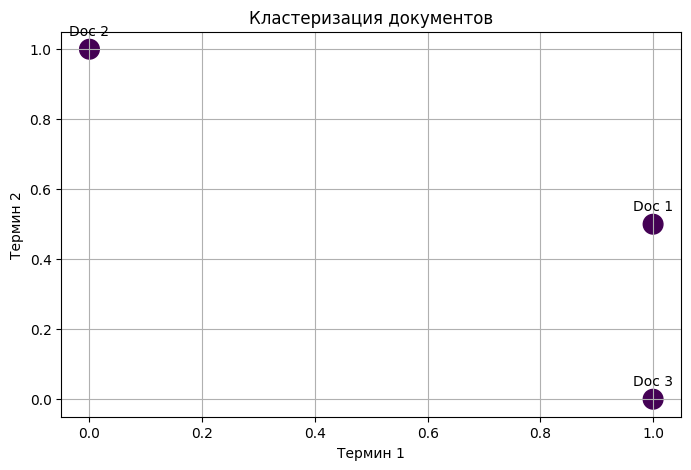

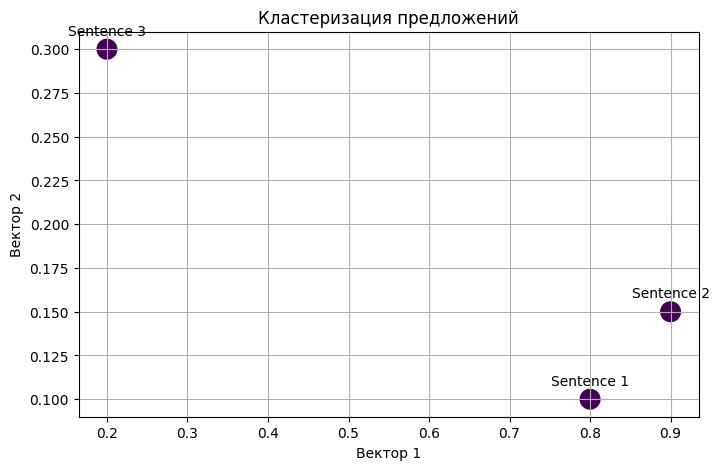

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AffinityPropagation

# Пример 1: Кластеризация документов
# Векторы документов (TF-IDF или векторы слов)
documents = np.array([
    [1, 0.5, 0],   # Документ 1: "Кошки и собаки"
    [0, 1, 0.5],   # Документ 2: "Собаки и мыши"
    [1, 0, 0.5]    # Документ 3: "Кошки ловят мышей"
])

# Вычисление расстояний (отрицательные сходства для Affinity Propagation)
distance_matrix = pairwise_distances(documents, metric='euclidean')
affinity_propagation = AffinityPropagation(affinity='precomputed').fit(distance_matrix)

# Получение меток кластеров
labels_documents = affinity_propagation.labels_

# Визуализация кластеров документов
plt.figure(figsize=(8, 5))
plt.scatter(documents[:, 0], documents[:, 1], c=labels_documents, cmap='viridis', s=200)
for i, txt in enumerate(["Doc 1", "Doc 2", "Doc 3"]):
    plt.annotate(txt, (documents[i, 0], documents[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title("Кластеризация документов")
plt.xlabel("Термин 1")
plt.ylabel("Термин 2")
plt.grid()
plt.show()

# Пример 2: Кластеризация предложений
# Векторы предложений (предположим, что это векторы из модели BERT)
sentences = np.array([
    [0.8, 0.1, 0.3],   # Предложение 1: "Солнце светит ярко."
    [0.9, 0.15, 0.4],  # Предложение 2: "Яркое солнце освещает пляж."
    [0.2, 0.3, 0.9]    # Предложение 3: "Пляж укрыт песком."
])

# Вычисление расстояний
distance_matrix_sentences = pairwise_distances(sentences, metric='euclidean')
affinity_propagation_sentences = AffinityPropagation(affinity='precomputed').fit(distance_matrix_sentences)

# Получение меток кластеров
labels_sentences = affinity_propagation_sentences.labels_

# Визуализация кластеров предложений
plt.figure(figsize=(8, 5))
plt.scatter(sentences[:, 0], sentences[:, 1], c=labels_sentences, cmap='viridis', s=200)
for i, txt in enumerate(["Sentence 1", "Sentence 2", "Sentence 3"]):
    plt.annotate(txt, (sentences[i, 0], sentences[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title("Кластеризация предложений")
plt.xlabel("Вектор 1")
plt.ylabel("Вектор 2")
plt.grid()
plt.show()

### Вопросы для самопроверки

1. Что такое Affinity Propagation и как он работает?
2. Какова основная цель использования Affinity Propagation в задачах NLP?
3. Какие метрики используются для определения сходства между документами в Affinity Propagation?
4. Объясните, что такое ответственность и доступность в контексте алгоритма Affinity Propagation.
5. Как алгоритм определяет количество кластеров?
6. В чем отличие Affinity Propagation от других алгоритмов кластеризации, таких как K-средние или иерархическая кластеризация?
7. Что такое предпочтение в Affinity Propagation и как оно влияет на результаты кластеризации?
8. Каковы основные этапы алгоритма Affinity Propagation?
9. Почему важно выбирать подходящую метрику для вычисления сходства в задачах NLP?
10. Приведите примеры применения Affinity Propagation в реальных задачах NLP.
11. Как можно интерпретировать результаты кластеризации, полученные с помощью Affinity Propagation?
12. Что происходит, если все предпочтения задать одинаковыми в алгоритме?
13. Как влияет размерность векторов на эффективность алгоритма Affinity Propagation?
14. Какие методы можно использовать для векторизации текстов перед применением Affinity Propagation?
15. Какие проблемы могут возникнуть при использовании Affinity Propagation для кластеризации больших объемов данных?

### Задачи для самостоятельной работы

1. Реализуйте алгоритм Affinity Propagation для кластеризации пяти текстовых документов, используя векторы TF-IDF.
2. Постройте матрицу сходства для набора предложений, используя косинусное сходство, и примените к ней Affinity Propagation.
3. Сравните результаты Affinity Propagation с K-средними для одного и того же набора данных.
4. Измените предпочтения в Affinity Propagation и проанализируйте, как это влияет на количество кластеров.
5. Используйте Affinity Propagation для кластеризации текстов на английском языке и визуализируйте результаты.
6. Реализуйте алгоритм Affinity Propagation для анализа набора данных о фильмах, основываясь на их описаниях.
7. Попробуйте применить Affinity Propagation к набору данных с изображениями, используя векторы признаков.
8. Сравните результаты кластеризации, используя разные метрики (например, евклидова и манхэттенская) в Affinity Propagation.
9. Проанализируйте влияние шума в данных на результаты кластеризации с помощью Affinity Propagation.
10. Измените параметры алгоритма Affinity Propagation (например, максимальное количество итераций) и посмотрите, как это повлияет на результаты.
11. Постройте график зависимости качества кластеризации от размера данных с использованием Affinity Propagation.
12. Примените Affinity Propagation для кластеризации новостей на русском языке.
13. Исследуйте, как Affinity Propagation справляется с текстами, имеющими много схожих слов.
14. Сравните качество кластеризации текстов, используя различные методы векторизации (например, BERT, Word2Vec).
15. Постройте график, показывающий, как изменяются метрики кластеризации (например, силуэт) в зависимости от предпочтений.
16. Реализуйте алгоритм Affinity Propagation для кластеризации отзывов о товарах.
17. Примените Affinity Propagation к набору данных с различными языковыми моделями и проанализируйте результаты.
18. Исследуйте, как выбрать предпочтения для Affinity Propagation, чтобы получить оптимальное количество кластеров.
19. Реализуйте функцию, которая будет автоматически генерировать векторы для текстов, используя предобученную модель.
20. Изучите влияние разных гиперпараметров на результаты кластеризации с помощью Affinity Propagation.
21. Реализуйте кластеризацию, используя Affinity Propagation для набора данных о социальных медиа.
22. Проведите анализ кластеров после выполнения Affinity Propagation и визуализируйте результаты.
23. Определите, как Affinity Propagation можно использовать для обнаружения аномалий в текстовых данных.
24. Проанализируйте, как можно оптимизировать производительность Affinity Propagation на больших объемах текстовой информации.
25. Примените Affinity Propagation для кластеризации данных о погоде, используя текстовые описания.
26. Используйте Affinity Propagation для обработки данных о здоровье и заболеваниях, собранных из текстов.
27. Разработайте метод для автоматической оценки качества кластеризации, полученной с помощью Affinity Propagation.
28. Примените Affinity Propagation для анализа чатов и сообщений в социальных сетях.
29. Сравните результаты кластеризации с использованием Affinity Propagation и иерархической кластеризации на одном и том же наборе данных.
30. Реализуйте кластеризацию с использованием Affinity Propagation для новостей о бизнесе, используя векторизацию текста.
